In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('pc3_csv.csv')

In [3]:
data.rename(columns = {'c':'output'}, inplace = True) 

In [4]:
data.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,output
0,2,1,0,0,0,0,1,0.10,0,0.00,...,2,0.08,28,29,9,5,13,0.00,10,False
1,1,1,4,0,0,0,1,0.07,0,0.00,...,6,0.06,52,55,26,14,16,0.00,14,False
2,27,19,1,4,13,26,11,0.26,12,2.17,...,25,0.13,58,78,30,24,83,30.91,42,False
3,2,17,2,0,0,24,9,0.47,8,3.00,...,25,0.41,73,81,23,20,22,0.00,19,False
4,6,1,1,0,2,0,1,0.11,0,0.00,...,3,0.06,19,23,15,7,18,18.18,9,False


In [5]:

# data["output"].replace({"True": 1, "False": 0}, inplace=True)

In [6]:
data.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,...,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000
mean,6.546385,9.649392,2.394114,1.317338,4.438260,15.150352,5.497761,0.288714,7.062060,1.566379,...,7.637876,17.726807,0.214255,56.794626,70.227127,22.017274,12.715291,35.770313,14.340467,23.335253
std,9.193725,21.142554,2.911106,3.320541,9.182347,39.377744,10.834772,0.195155,19.025372,1.025317,...,19.799265,35.564286,0.215738,154.823532,190.845052,38.218763,6.899234,52.127212,19.546351,41.496929
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000,0.000000,...,0.000000,2.000000,0.010000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.170000,0.000000,0.000000,...,0.000000,5.000000,0.100000,11.000000,16.000000,7.000000,8.000000,10.000000,0.000000,7.000000
50%,3.000000,5.000000,1.000000,0.000000,0.000000,8.000000,3.000000,0.250000,4.000000,2.000000,...,4.000000,10.000000,0.160000,25.000000,33.000000,13.000000,12.000000,20.000000,2.600000,13.000000
75%,8.500000,11.000000,3.000000,1.000000,5.000000,16.000000,6.000000,0.330000,8.000000,2.000000,...,8.000000,19.000000,0.250000,58.000000,72.000000,26.000000,16.000000,44.000000,25.000000,26.000000
max,77.000000,589.000000,24.000000,42.000000,78.000000,1148.000000,299.000000,1.240000,570.000000,5.000000,...,574.000000,963.000000,2.000000,4015.000000,5590.000000,787.000000,68.000000,891.000000,93.940000,817.000000


In [7]:
data.isna().count()

LOC_BLANK                          1563
BRANCH_COUNT                       1563
CALL_PAIRS                         1563
LOC_CODE_AND_COMMENT               1563
LOC_COMMENTS                       1563
CONDITION_COUNT                    1563
CYCLOMATIC_COMPLEXITY              1563
CYCLOMATIC_DENSITY                 1563
DECISION_COUNT                     1563
DECISION_DENSITY                   1563
DESIGN_COMPLEXITY                  1563
DESIGN_DENSITY                     1563
EDGE_COUNT                         1563
ESSENTIAL_COMPLEXITY               1563
ESSENTIAL_DENSITY                  1563
LOC_EXECUTABLE                     1563
PARAMETER_COUNT                    1563
HALSTEAD_CONTENT                   1563
HALSTEAD_DIFFICULTY                1563
HALSTEAD_EFFORT                    1563
HALSTEAD_ERROR_EST                 1563
HALSTEAD_LENGTH                    1563
HALSTEAD_LEVEL                     1563
HALSTEAD_PROG_TIME                 1563
HALSTEAD_VOLUME                    1563


In [8]:
data.head(10)

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,output
0,2,1,0,0,0,0,1,0.10,0,0.00,...,2,0.08,28,29,9,5,13,0.00,10,False
1,1,1,4,0,0,0,1,0.07,0,0.00,...,6,0.06,52,55,26,14,16,0.00,14,False
2,27,19,1,4,13,26,11,0.26,12,2.17,...,25,0.13,58,78,30,24,83,30.91,42,False
3,2,17,2,0,0,24,9,0.47,8,3.00,...,25,0.41,73,81,23,20,22,0.00,19,False
4,6,1,1,0,2,0,1,0.11,0,0.00,...,3,0.06,19,23,15,7,18,18.18,9,False
5,1,15,3,0,0,28,8,0.28,14,2.00,...,26,0.26,63,80,22,21,31,0.00,29,False
6,0,1,0,0,1,0,1,0.33,0,0.00,...,2,0.20,2,6,2,6,5,25.00,3,False
7,26,5,4,0,4,8,3,0.07,4,2.00,...,14,0.04,114,129,39,21,72,8.89,41,True
8,3,9,3,0,0,16,5,0.21,8,2.00,...,18,0.18,47,54,19,12,28,0.00,24,False
9,6,37,2,5,4,60,19,0.23,24,2.50,...,46,0.20,116,150,46,21,93,10.47,82,False


In [9]:
data['output'].value_counts()

False    1403
True      160
Name: output, dtype: int64

Text(0.5, 1.0, 'output')

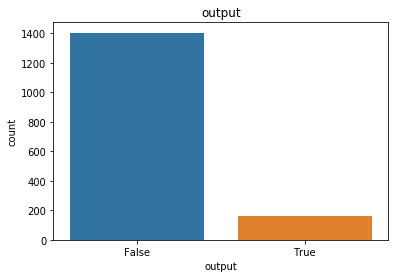

In [10]:
import seaborn as sns 
sns.countplot(data['output']).set_title('output')

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [12]:
X= data.drop(['output'], axis = 1) 
Y= data['output']

In [13]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # normalizing the featu

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(["output"], axis=1), data["output"],
                                                    random_state=10, test_size=0.25)

In [15]:
x_train.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
1448,20,7,3,3,8,12,4,0.14,6,2.0,...,6,17,0.07,72,76,27,19,57,30.56,28
1094,1,9,1,0,0,16,5,0.28,8,2.0,...,8,19,0.25,34,43,11,15,20,0.00,18
915,6,3,1,0,1,4,2,0.08,2,2.0,...,2,6,0.06,139,148,11,15,33,3.85,25
202,36,25,6,12,6,36,13,0.22,12,3.0,...,26,34,0.13,143,173,70,17,102,27.69,59
1268,4,5,2,2,0,8,3,0.19,4,2.0,...,4,10,0.14,29,38,18,13,21,12.50,16


In [16]:
y_test.head()

924     False
203     False
1530    False
1544    False
1441    False
Name: output, dtype: bool

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [18]:
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
logit_pred = logit.predict(x_test)

In [20]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,False,All
Actual,,
False,87,87
True,11,11
All,98,98


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.91
Precision is 0.62
Recall is 0.13


In [22]:
# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({False: 1403, True: 160})
New dataset shape Counter({False: 1403, True: 1403})


In [23]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X))

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
logit_pred = logit.predict(X_test)

In [26]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,False,True,All
Actual,,,
False,51,52,103
True,6,4,10
All,57,56,113


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)
auc_logit = roc_auc_score(y_test, logit_pred)
print(auc_logit)

Accuracy is 0.51
Precision is 0.51
Recall is 0.53
0.5088967971530249


In [28]:
##Decision treee

In [29]:
# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({False: 1403, True: 160})
New dataset shape Counter({False: 1403, True: 1403})


In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=28, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
dtree_pred = dtree.predict(X_test)

In [32]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,False,True,All
Actual,,,
False,55,48,103
True,6,4,10
All,61,52,113


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)
auc_dtree = roc_auc_score(y_test, dtree_pred)

Accuracy is 0.90
Precision is 0.88
Recall is 0.92
AUC is 0.90


In [34]:
# # Create list of top most features based on importance
# feature_names = X_train.columns
# feature_imports = dtree.feature_importances_
# most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
# most_imp_features.sort_values(by="Importance", inplace=True)
# print(most_imp_features)
# plt.figure(figsize=(10,6))
# plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
# plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
# plt.xlabel('Importance')
# plt.title('Most important features - Decision Tree')
# plt.show()

In [35]:
### Random Forest

In [36]:

seed = 7

# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=seed)

Original dataset shape Counter({False: 1403, True: 160})
New dataset shape Counter({False: 1403, True: 1403})


In [37]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 20, max_depth=30, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
rm_prd = rm.predict(X_test)

In [39]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,False,True,All
Actual,,,
False,47,53,100
True,4,3,7
All,51,56,107


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)
auc_rm = roc_auc_score(y_test, rm_prd)

Accuracy is 0.93
Precision is 0.91
Recall is 0.94
AUC is 0.93


In [41]:
###adaboost

In [42]:
# Data balancing applied using SMOTE
seed = 7

from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=seed)

Original dataset shape Counter({False: 1403, True: 160})
New dataset shape Counter({False: 1403, True: 1403})


In [43]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 2000)

In [44]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=2000, random_state=None)

In [45]:
ada_pred = ada.predict(X_test)

In [46]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(ada_pred, name = 'Predict'), margins = True)

Predict,False,True,All
Actual,,,
False,51,49,100
True,4,3,7
All,55,52,107


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, ada_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, ada_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, ada_pred)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, ada_pred)))

accuracy_ada = accuracy_score(y_test, ada_pred)
precision_ada = precision_score(y_test, ada_pred)
recall_ada = recall_score(y_test, ada_pred)
auc_ada = roc_auc_score(y_test, ada_pred)

Accuracy is 0.93
Precision is 0.93
Recall is 0.92
AUC is 0.93


In [48]:
#XGBOOST

In [49]:
seed = 7
# test_size = 0.33
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=seed)

Original dataset shape Counter({False: 1403, True: 160})
New dataset shape Counter({False: 1403, True: 1403})


In [50]:
# fit model no training data
model = XGBClassifier(n_estimators = 1500)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [51]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, predictions)))
print("Precision is {0:.2f}".format(precision_score(y_test, predictions)))
print("Recall is {0:.2f}".format(recall_score(y_test, predictions)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test, predictions)))

accuracy_xg = accuracy_score(y_test, predictions)
precision_xg = precision_score(y_test, predictions)
recall_xg = recall_score(y_test, predictions)
auc_xg = roc_auc_score(y_test, predictions)

Accuracy is 0.95
Precision is 0.94
Recall is 0.96
AUC is 0.95


In [53]:
### Model comparision

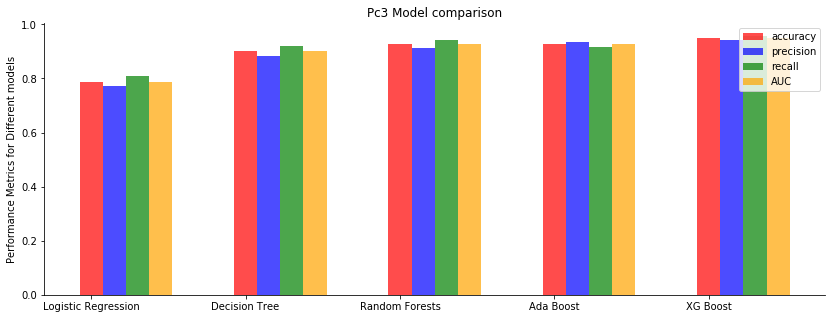

In [54]:
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [accuracy_logit, accuracy_dtree, accuracy_rm, accuracy_ada,accuracy_xg]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [precision_logit, precision_dtree, precision_rm, precision_ada,precision_xg]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [recall_logit, recall_dtree, recall_rm, recall_ada,recall_xg]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests', 'Ada Boost', 'XG Boost']
values = [auc_logit, auc_dtree, auc_rm, auc_ada,auc_xg]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Pc3 Model comparison')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()       